In [114]:
! pip install dmba
import pandas as pd
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [170]:
df = pd.read_csv('BD24_dataset.csv')

In [131]:
df.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
df = df.dropna()
#df.to_csv('filename.csv', index=False)

<ipython-input-133-ba95d103c329>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


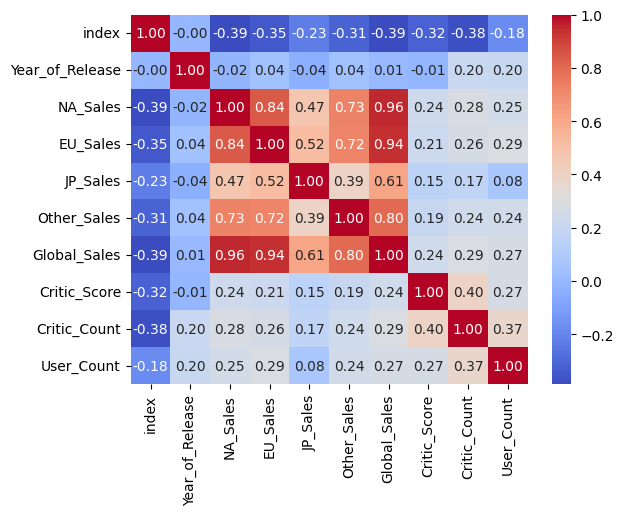

In [133]:

# Assuming you have a DataFrame 'df' with numerical columns
correlation_matrix = df.corr()

# This will give you a DataFrame with the correlation values

import seaborn as sns
import matplotlib.pyplot as plt

# Use seaborn to create a heatmap of the correlation matrix with annotations rounded to two decimal places
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Show the plot
plt.show()



In [134]:
# Top 10 Publishers with the highest overall average global sales
categories = ['Nintendo', 'Bethesda Softworks', 'Gt Interactive', 'Hasbro Interactive', 'Hello Games', 'Microsoft Game Studios', 'RedOctane', 'Sony Computer Entertainment Europe', 'SquareSoft', 'Valve' ]  # Replace these with your actual categories

# Filter the DataFrame
df = df[df['Publisher'].isin(categories)]


In [135]:
df = df.drop(columns = ['Platform', 'Name', 'Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',  'Critic_Count', 'User_Count', 'Developer'])

In [137]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame

# Normalize numerical features
numerical_features = ['Global_Sales', 'Critic_Score', 'User_Score']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Create dummy variables for categorical features
categorical_features = ['Genre', 'Publisher', 'Rating']
df = pd.get_dummies(df, columns=categorical_features)

# Now 'df' is ready for use in MLR


In [140]:
df.head()

,index,Global_Sales,Critic_Score,User_Score,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,...,Publisher_Microsoft Game Studios,Publisher_Nintendo,Publisher_RedOctane,Publisher_Sony Computer Entertainment Europe,Publisher_SquareSoft,Publisher_Valve,Rating_E,Rating_E10+,Rating_M,Rating_T
0,0,14.682124,-0.054172,0.257037,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,2,6.071211,0.450891,0.505303,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,3,5.567488,0.282537,0.257037,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
6,6,5.023467,1.040132,0.670815,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
7,7,4.862276,-1.569362,-0.901542,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


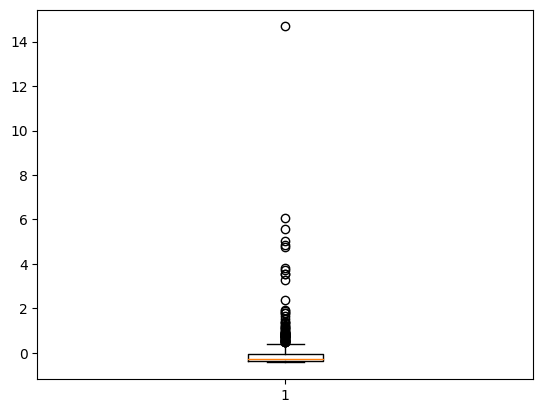

In [141]:
# Original box plot showing the outliers
plt.boxplot(df['Global_Sales'], notch=None, vert=None, patch_artist=None, widths=None)
plt.show()

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) of the 'Operating Profit'
q1 = df['Global_Sales'].quantile(0.25)
q3 = df['Global_Sales'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
iqr = q3 - q1

# Identify the outliers
outliers = (df['Global_Sales'] < q1 - 1.5 * iqr) | (df['Global_Sales'] > q3 + 1.5 * iqr)

# Filter out the outliers to get a new DataFrame without outliers
df= df[~outliers]

# Now df_no_outliers contains the data without the outliers
print('There are ' + str(9648-df['Global_Sales'].count()) + ' outliers according to the formula. We have gotten rid of them.')

There are 9214 outliers according to the formula. We have gotten rid of them.


In [142]:
X = df.drop(columns = 'Global_Sales', 'Genre_Platform', 'Genre_Shooter', 'Genre_Simulation', 'Genre_Strategy', '')
y = df['Global_Sales']

In [143]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4,
random_state=42)

In [144]:
import statsmodels.api as sm

# Add a constant to the independent values to represent the intercept
X_train_with_constant = sm.add_constant(train_X)

# Fit the model
model = sm.OLS(train_y, X_train_with_constant).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     3.552
Date:                Fri, 23 Feb 2024   Prob (F-statistic):           3.86e-07
Time:                        17:51:22   Log-Likelihood:                -255.66
No. Observations:                 311   AIC:                             557.3
Df Residuals:                     288   BIC:                             643.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

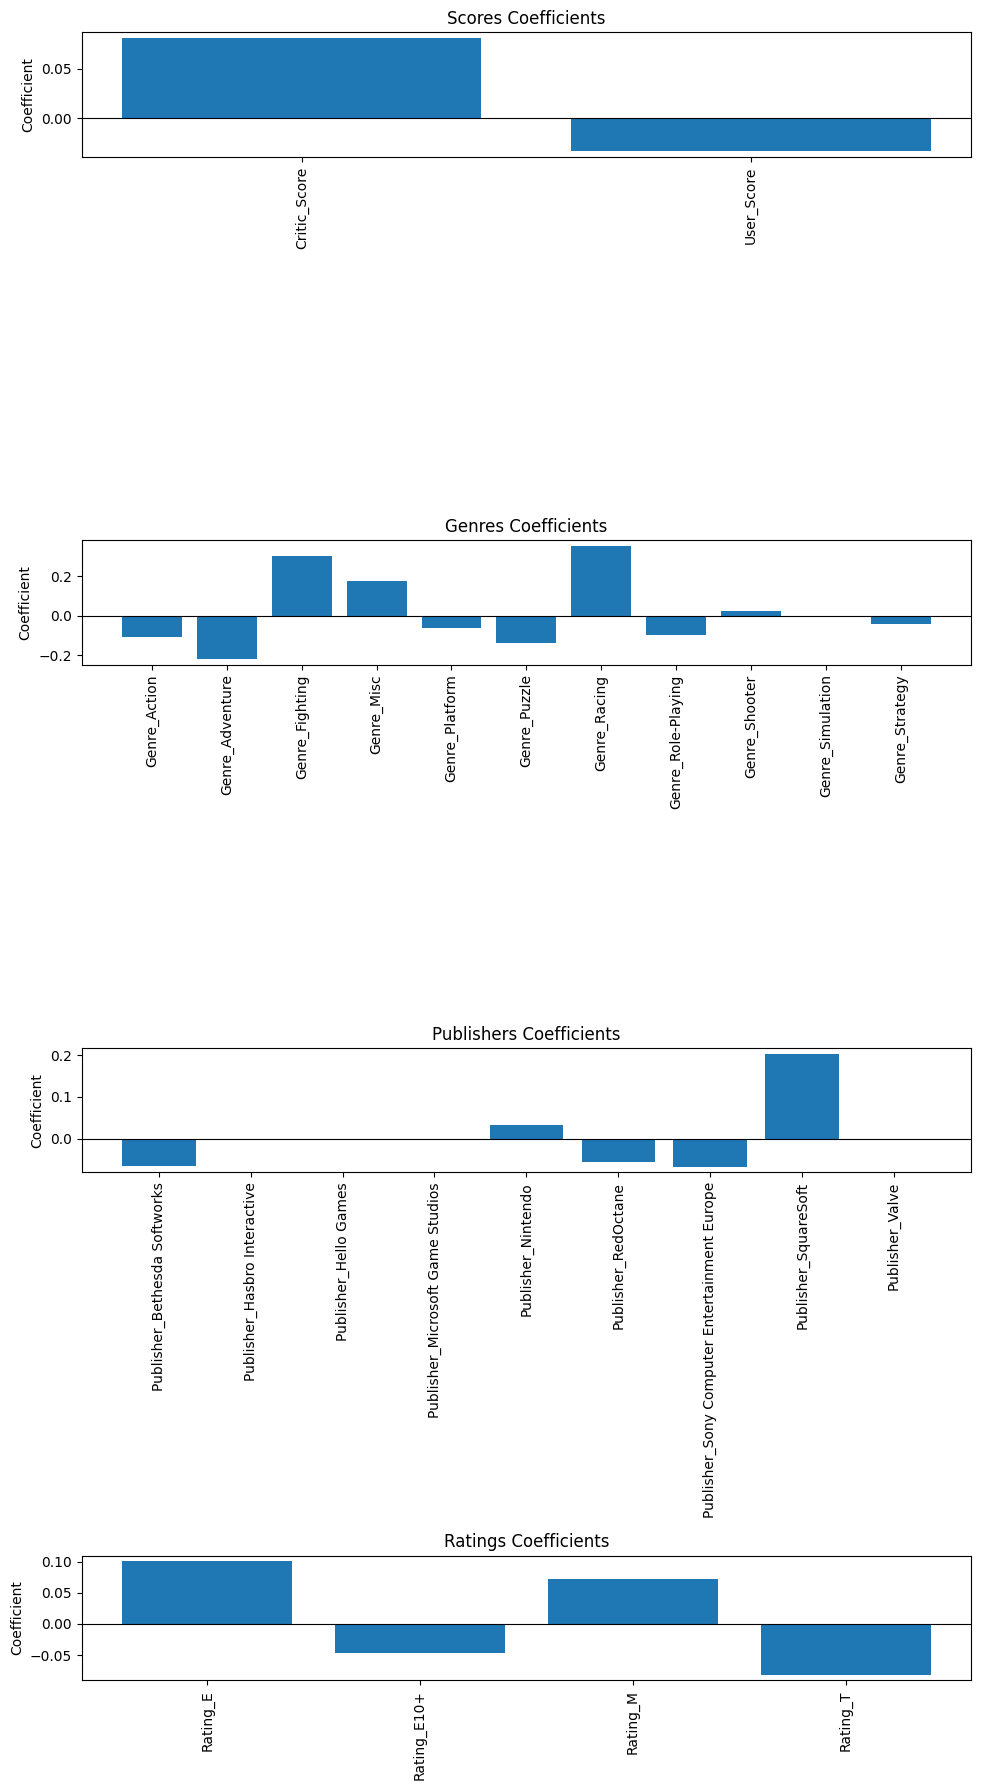

In [151]:
import matplotlib.pyplot as plt

# Extracted coefficients from the image provided
coefficients = {
    'Critic_Score': 0.0812,
    'User_Score': -0.0330,
    'Genre_Action': -0.1069,
    'Genre_Adventure': -0.2180,
    'Genre_Fighting': 0.3056,
    'Genre_Misc': 0.1791,
    'Genre_Platform': -0.0625,
    'Genre_Puzzle': -0.1369,
    'Genre_Racing': 0.3548,
    'Genre_Role-Playing': -0.0983,
    'Genre_Shooter': 0.0230,
    'Genre_Simulation': 0.0005,
    'Genre_Strategy': -0.0406,
    'Publisher_Bethesda Softworks': -0.0655,
    'Publisher_Hasbro Interactive': -9.133e-17,
    'Publisher_Hello Games': 2.67e-17,
    'Publisher_Microsoft Game Studios': -0.0006,
    'Publisher_Nintendo': 0.0314,
    'Publisher_RedOctane': -0.0568,
    'Publisher_Sony Computer Entertainment Europe': -0.0676,
    'Publisher_SquareSoft': 0.2034,
    'Publisher_Valve': 0,
    'Rating_E': 0.1003,
    'Rating_E10+': -0.0468,
    'Rating_M': 0.0724,
    'Rating_T': -0.0815
}

# Separate the coefficients into categories
scores = {k: v for k, v in coefficients.items() if 'Score' in k}
genres = {k: v for k, v in coefficients.items() if 'Genre_' in k}
publishers = {k: v for k, v in coefficients.items() if 'Publisher_' in k}
ratings = {k: v for k, v in coefficients.items() if 'Rating_' in k}

# Function to create coefficient bar charts
def create_coefficient_chart(data, category, ax):
    keys = list(data.keys())
    values = list(data.values())
    ax.bar(keys, values)
    ax.set_ylabel('Coefficient')
    ax.set_title(f'{category} Coefficients')
    ax.axhline(0, color='black', linewidth=0.8)
    ax.tick_params(axis='x', rotation=90)

# Create subplots for each category
fig, axs = plt.subplots(4, 1, figsize=(10, 18))

# Generate each bar chart
create_coefficient_chart(scores, 'Scores', axs[0])
create_coefficient_chart(genres, 'Genres', axs[1])
create_coefficient_chart(publishers, 'Publishers', axs[2])
create_coefficient_chart(ratings, 'Ratings', axs[3])

# Adjust the layout
plt.tight_layout()
plt.show()


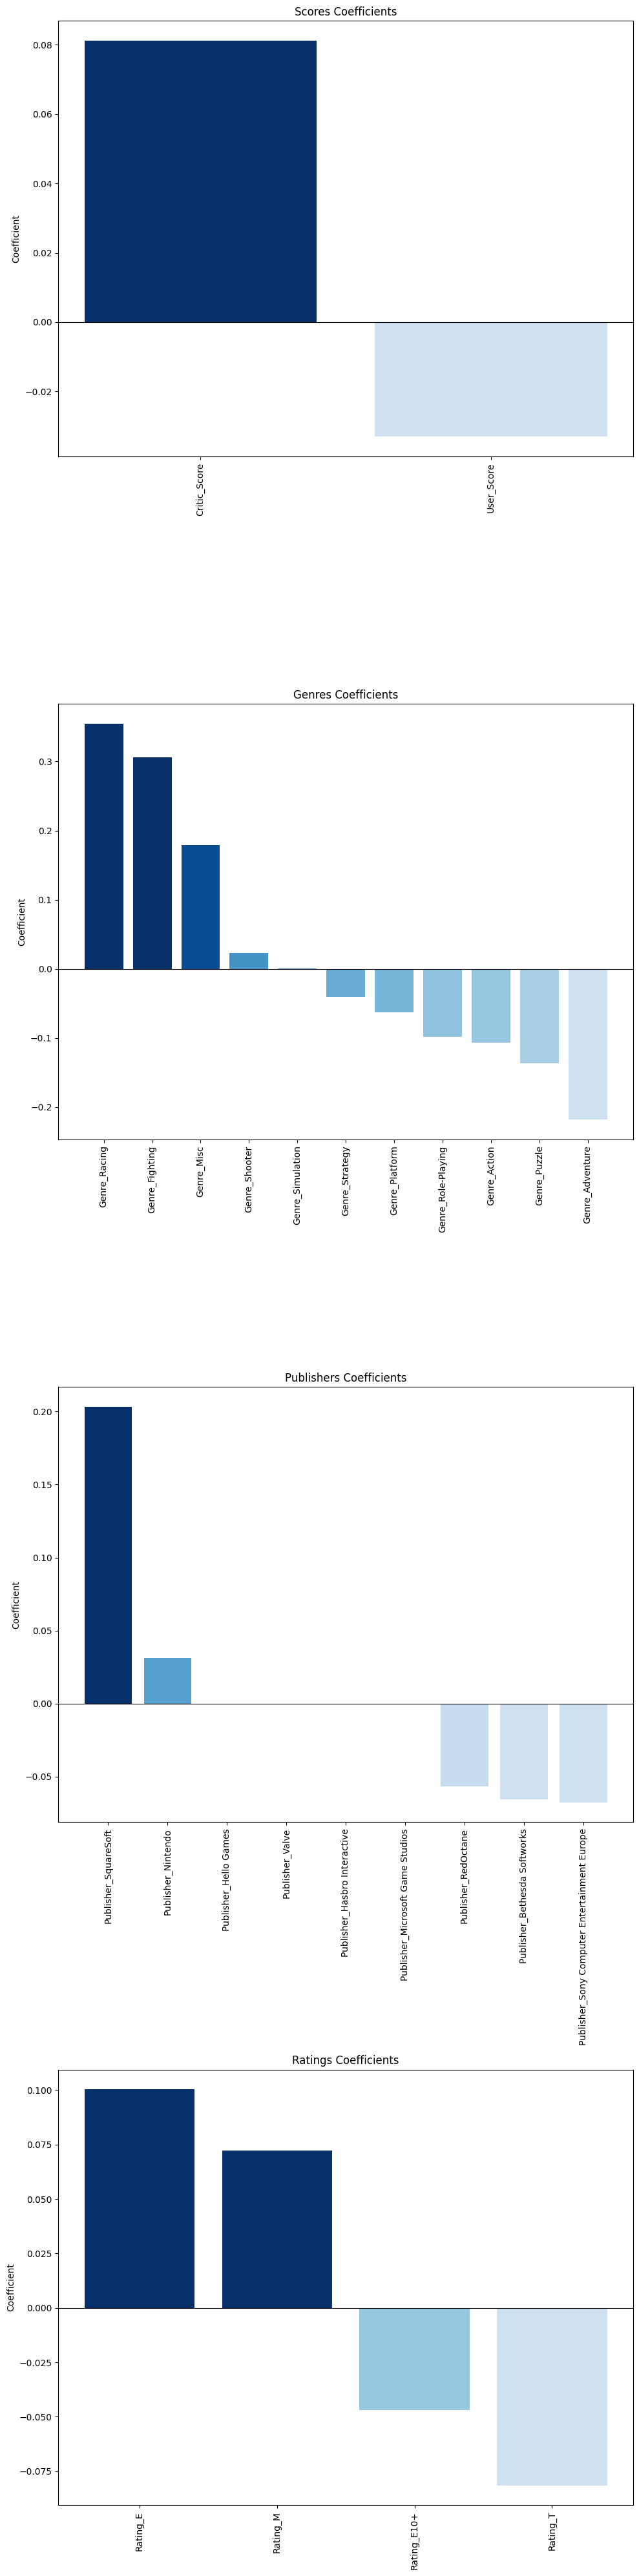

In [152]:
# Adjust the function to create coefficient bar charts with descending order and improved color intensity
def create_coefficient_chart_desc_improved(data, category, ax):
    # Sort the coefficients by their values in descending order
    sorted_data = dict(sorted(data.items(), key=lambda item: item[1], reverse=True))
    keys = list(sorted_data.keys())
    values = list(sorted_data.values())

    # Normalize the values for color mapping (darker color for higher value)
    max_coef = max(values)
    min_coef = min(values)
    range_coef = max_coef - min_coef
    # Avoid division by zero in case all coefficients are the same
    if range_coef == 0:
        range_coef = 1
    # Adding a bias to make smaller values more visible
    colors = [(v - min_coef) / range_coef + 0.2 for v in values]  # Normalized values for colormap, +0.2 for visibility
    # Ensure that the maximum value does not exceed 1 after adding bias
    colors = [min(c, 1.0) for c in colors]
    color_map = plt.cm.Blues(colors)  # Apply normalized values to colormap

    # Create the bar chart with descending order and improved color intensity
    ax.bar(keys, values, color=color_map)
    ax.set_ylabel('Coefficient')
    ax.set_title(f'{category} Coefficients')
    ax.axhline(0, color='black', linewidth=0.8)
    ax.tick_params(axis='x', rotation=90)

# Create subplots for each category with increased vertical spacing
fig, axs = plt.subplots(4, 1, figsize=(10, 40))

# Generate each bar chart with more vertical space and in descending order
create_coefficient_chart_desc_improved(scores, 'Scores', axs[0])
create_coefficient_chart_desc_improved(genres, 'Genres', axs[1])
create_coefficient_chart_desc_improved(publishers, 'Publishers', axs[2])
create_coefficient_chart_desc_improved(ratings, 'Ratings', axs[3])

# Adjust the layout
plt.tight_layout()
plt.show()


In [102]:
print('intercept ', model.intercept_)
print(pd.DataFrame({'Predictor': train_X.columns, 'coefficient': model.coef_}))

# print performance measures
regressionSummary(train_y, new_model.predict(train_X))

intercept  0.049234004660615935
        Predictor  coefficient
0           index    -0.000047
1    Critic_Score     0.073863
2  Genre_Fighting     0.374766
3      Genre_Misc     0.269077
4    Genre_Racing     0.454544
5        Rating_T    -0.138158

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.5562
            Mean Absolute Error (MAE) : 0.2689
          Mean Percentage Error (MPE) : -1.8603
Mean Absolute Percentage Error (MAPE) : 193.9855
